void set_plot_style()
{
    const Int_t NRGBs = 5;
    const Int_t NCont = 255;

    Double_t stops[NRGBs] = { 0.00, 0.34, 0.61, 0.84, 1.00 };
    Double_t red[NRGBs]   = { 0.00, 0.00, 0.87, 1.00, 0.51 };
    Double_t green[NRGBs] = { 0.00, 0.81, 1.00, 0.20, 0.00 };
    Double_t blue[NRGBs]  = { 0.51, 1.00, 0.12, 0.00, 0.00 };
    TColor::CreateGradientColorTable(NRGBs, stops, red, green, blue, NCont);
    gStyle->SetNumberContours(NCont);
}

## Numero de Eventos
$N_{x}=\mathcal{L}\sigma_{x}$, $N_{x}$: Numero de eventos de $x$, $\mathcal{L}$: Luminosity

## Efficiencia
$E_{ff_x}=\frac{N_{x_f}}{N_{x_o}}$, $N_{x_f}$:Numero de eventos de x despues de cortes, $N_{o_f}$: Numero de eventos de x antes de cortes.

Luego:

$N_{x_f}=E_{ff_x}N_{x_o}~\Rightarrow~N_{x_f}=E_{ff_x}\sigma_{x}\mathcal{L}$

In [1]:
#include<cmath>

In [2]:
gROOT->ProcessLine(".x CVSReader.C");

(int) 0


## Significancia
$Z=\frac{S}{\sqrt{S+B}}$, $S$: Numero de eventos de señal , $B$: Numero de eventos de background

In [3]:
/*XC pb and Lumi fb^{-1}*/
Double_t Significance(Double_t Lumi,Double_t XCSignal,Double_t EffSignal,std::vector<Double_t> XCBG,std::vector<Double_t> EffBG){
  
    if(XCBG.size() != EffBG.size()){
        std::cout<<  "ERROR: XCBG and EffBG should be same size" << std::endl;
        return 0;
    }
    Double_t TotalBG = 0;
    for (Int_t i=0;i<XCBG.size();i++){
        TotalBG += XCBG[i]*EffBG[i]*1000;//*1000 bp to fb
        //std::cout<<  TotalBG << std::endl;
    }
    Double_t Denominator = std::sqrt((XCSignal*EffSignal*1000+TotalBG)*Lumi);//*1000 bp to fb
    Double_t Numerator = XCSignal*EffSignal*Lumi*1000;
    Double_t Z = Numerator/Denominator;
    return Z;
}

$Z=\frac{S}{\sqrt{S+B}}~\Rightarrow~Z^2=\frac{S^2}{S+B}~\Rightarrow~Z^2=\frac{(E_{ff_S}\sigma_{S}\mathcal{L})^2}{(E_{ff_S}\sigma_{S}\mathcal{L})+(E_{ff_B}\sigma_{B}\mathcal{L})}$


$Z^2=\frac{E_{ff_S}\sigma_{S}^2\mathcal{L}}{E_{ff_S}\sigma_{S}+E_{ff_B}\sigma_{B}}$

## Luminosity to have some Significance
$\mathcal{L}=Z^2 \frac{E_{ff_S}\sigma_{S}+E_{ff_B}\sigma_{B}}{(E_{ff_S}\sigma_{S})^2}$

Si se tiene $N_{f_B}(100fb^{-1})=277606.870$, como $E_{ff_B}\sigma_{B}=\frac{N_{f_B}(100fb^{-1})}{100fb^{-1}}$, entonces

$E_{ff_B}\sigma_{B}=2776.06870fb=2.77606870pb$

In [4]:
//XC pb y lumi fb-1
Double_t Lumi(Double_t Z,Double_t XCSignal,Double_t EffSignal,std::vector<Double_t> XCBG,std::vector<Double_t> EffBG){
  
    if(XCBG.size() != EffBG.size()){
        std::cout<<  "ERROR: XCBG and EffBG should be same size" << std::endl;
        return 0;
    }
    Double_t TotalBG = 0;
    for (Int_t i=0;i<XCBG.size();i++){
        TotalBG += XCBG[i]*EffBG[i]*1000;//pb to fb
        //std::cout<< "XC: " <<XCBG[i] <<" , Eff: "<< EffBG[i]<< std::endl;
    }
    Double_t Numerator = ((EffSignal*XCSignal*1000)+TotalBG)*Z*Z;
    Double_t Denominator = (EffSignal*XCSignal*1000)*(EffSignal*XCSignal*1000);
    
    Double_t Lum = Numerator/Denominator;
    return Lum;
}

In [5]:
//Xs fb
Double_t Xs[]= {751.3, 633.5, 540.3, 460.3, 398.0, 343.3, 300.1, 262.3, 231.9, 203.9, 181.0, 161.1, 144.1, 128.9, 115.6, 103.8, 93.82, 84.97, 77.13};
Double_t MF[]= {100  , 105  , 110  , 115  , 120  , 125  , 130  , 135  , 140  , 145  , 150  , 155  , 160  , 165, 170, 175, 180, 185, 190};
// You can choose among the following methods:
// kLINEAR, kPOLYNOMIAL, kCSPLINE, kCSPLINE_PERIODIC, kAKIMA, kAKIMA_PERIODIC 
const Int_t ni = 19;//size of the arrays
ROOT::Math::Interpolator XS(ni, ROOT::Math::Interpolation::kLINEAR);
XS.SetData(ni, MF, Xs);

In [6]:
std::vector<Double_t> _XCBG;
std::vector<Double_t> _EffBG;
_XCBG.push_back(2.776068702);//In pb 2.776068702
_EffBG.push_back(1);

In [7]:
// Creating an object of CSVWriter
CSVReader reader("EffVLF_BRmu25_BRtau75_inter.csv");

In [8]:
// Get the data from CSV File
std::vector<std::vector<std::string> > dataList = reader.getData();

In [9]:
TCanvas *c1 = new TCanvas("c1","ContornPlot",200,10,700,500);

In [10]:
Double_t MinY = 2;
Double_t MinX = 100;
Double_t MaxY = 21;
Double_t MaxX = 170;

In [11]:
gStyle->SetOptStat(0);
//TH2D *h1 = new TH2D("h1","h1",19,MinX,MaxX,14,MinY,MaxY);
TH2D *h1 = new TH2D("h1","h1",14,MinX,MaxX,19,MinY,MaxY);
std::vector<Double_t> FistRow;
std::vector<Double_t> FistCol;
int count1 = 0;

In [12]:
auto Frame = c1->DrawFrame(MinX,MinY,MaxX,MaxY);
c1->SetRightMargin(0.15);
//gStyle->SetPalette(55);
//gStyle->SetPalette(87);
gStyle->SetPalette(1);
gStyle->SetNumberContours(35)

In [13]:
Frame->GetXaxis()->SetTitle("m_{F} [GeV]");
Frame->GetYaxis()->SetTitle("#Deltam(F,#chi) [GeV]");
Frame->GetYaxis()->CenterTitle("True");
Frame->GetYaxis()->SetTitleFont(42);
Frame->GetXaxis()->SetTitleFont(42);
Frame->GetYaxis()->SetTitleSize(0.04);
Frame->GetXaxis()->SetTitleSize(0.04);

In [14]:
//TLatex *   tex = new TLatex(0.85,0.91,"BR(F#rightarrow #mu,#tau)= 25%,75%; 3#sigma (13 TeV, 0 PU)");
TLatex *   tex = new TLatex(0.85,0.91,"BR(F #rightarrow #mu)= 25%, BR(F #rightarrow #tau)= 75%; 3#sigma, 13 TeV");
tex->SetNDC();
tex->SetTextAlign(31);
tex->SetTextFont(42);
tex->SetTextSize(0.04);
tex->SetLineWidth(2);
tex->Draw("Same");

In [15]:
TLatex *   tex1 = new TLatex(0.97,0.7,"Luminosity [10^{3} fb^{-1}]");
tex1->SetNDC();
tex1->SetTextAlign(31);
tex1->SetTextFont(42);
tex1->SetTextSize(0.04);
tex1->SetLineWidth(2);
tex1->SetTextAngle(90);
//tex1->Draw("Same");

In [16]:
//gStyle->SetPaintTextFormat("4.1f m");
gStyle->SetPaintTextFormat("1.2f");

In [17]:
//Bool_t debug = kFALSE;  
Bool_t debug = kTRUE;  

In [18]:
// Print the content of row by row on screen
count1 = 0; 
for(std::vector<std::string> vec : dataList){
    int count2 = 0;
    for(std::string Data : vec){
        Double_t data = atof(Data.c_str());
        if (count1 == 0){
            FistRow.push_back(data);
        }else{
            if (count2 == 0){
                FistCol.push_back(data);
            }else{
                if(data != 0){//To be sure dont use the 0s
                    // Z/31.63 Para que Lumi=lumi/1000
                    /*
                    3sigma = 0.0948466646
                    5sigma = 0.1580777743                
                    */
                    Double_t Lum = Lumi(0.0948466646,XS.Eval((Double_t)FistRow[count2])*0.001,data,_XCBG,_EffBG);
                    //h1->Fill(FistCol.back(),FistRow[count2],Lum);
                    h1->Fill(FistRow[count2],FistCol.back(),Lum);
                    if(debug){
                        std::cout<<"XS: "<<XS.Eval(FistRow[count2])*0.001,4;
                        std::cout<<" (" << FistCol.back() << ","; 
                        std::cout<<FistRow[count2] << ",";
                        std::cout<<data << ") , ";
                    }
                    }else{
                        //Deberia extrapolar entre los que o tengo
                    }
                }
            
        }
        count2++;
    }
    count1++;
    if(debug){
        std::cout<<std::endl;
        std::cout<<std::endl;
    }
} 



XS: 0.6335 (20,105,0.00379685) , XS: 0.5403 (20,110,0.00447043) , XS: 0.4603 (20,115,0.00403681) , XS: 0.398 (20,120,0.00425467) , XS: 0.3433 (20,125,0.00434561) , XS: 0.3001 (20,130,0.00533655) , XS: 0.2623 (20,135,0.00505628) , XS: 0.2319 (20,140,0.0055302) , XS: 0.2039 (20,145,0.0049309) , XS: 0.181 (20,150,0.00550153) , XS: 0.1611 (20,155,0.00530308) , XS: 0.1441 (20,160,0.00614862) , XS: 0.1289 (20,165,0.00588782) , 

XS: 0.7513 (19,100,0.00357097) , XS: 0.6335 (19,105,0.0038263) , XS: 0.5403 (19,110,0.00478445) , XS: 0.4603 (19,115,0.00422278) , XS: 0.398 (19,120,0.00535675) , XS: 0.3433 (19,125,0.00483937) , XS: 0.3001 (19,130,0.0048736) , XS: 0.2623 (19,135,0.00518944) , XS: 0.2319 (19,140,0.00584294) , XS: 0.2039 (19,145,0.0053508) , XS: 0.181 (19,150,0.00594941) , XS: 0.1611 (19,155,0.0057148) , XS: 0.1441 (19,160,0.00546418) , XS: 0.1289 (19,165,0.00687605) , 

XS: 0.7513 (18,100,0.00393839) , XS: 0.6335 (18,105,0.0042203) , XS: 0.5403 (18,110,0.0041489) , XS: 0.4603 (18,1

In [19]:
h1->DrawCopy("colz same");
h1->DrawCopy("TEXT same");
//h1->DrawCopy("TEXTE0 same");
tex1->Draw("Same");

Double_t contours[2];
contours[0] = 1.0;
contours[1] = 3.0;
//contours[2] = 3.0;
//contours[3] = 4.0;
//contours[4] = 5.0;
//contours[5] = 6.0;

h1->SetContour(2, contours);

// Draw contours as filled regions, and Save points
//h1->Draw("CONT Z LIST");
h1->Draw("CONT1 SAME");
c1->Update(); // Needed to force the plotting and retrieve the contours in TGraphs

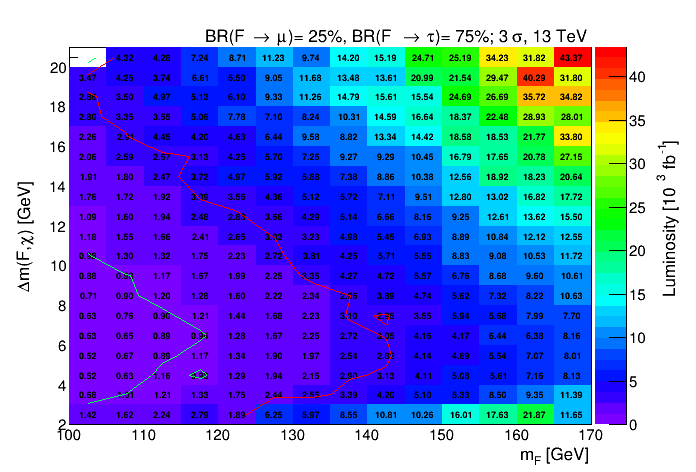

In [20]:
c1->Draw()

In [21]:
string Name    = "";
string NameC   = "";
string NamePDF = "";

In [22]:
Name = "LumiToExclusionSigma3_BRmu25tau75";
NameC = Name +".C";
NamePDF = Name +".pdf";
//c1->SaveSource(NameC.c_str());
//c1->SaveAs(NamePDF.c_str(),"pdf");

In [23]:
.! pwd

/home/camilo/cms/AnalysisCode/ContourPlot
